In [1]:
import concurrent.futures
import os
import sys
from functools import partial

sys.path.append('..')

import matplotlib.pyplot as plt
import numpy as np

from materials import get_materials_Cvec
from safe_module import distance
from themes import color_themes
from themes import symmetry_classes

In [2]:
write = False

In [3]:
colors = color_themes()

In [4]:
temperatures_WG2D = [100, 200, 400, 600]

In [5]:
c_vecs = get_materials_Cvec(material="Lokajicek")
c_vecs = c_vecs[:4]
n_materials = len(c_vecs)
n_temperatures_WG2D = len(temperatures_WG2D)

n_symmetry_classes = len(symmetry_classes)

num_workers = os.cpu_count()

betas_WG2D = np.zeros((n_symmetry_classes, n_temperatures_WG2D))

c_vecs   = c_vecs * n_symmetry_classes
sigmas   = [sigma for sigma in symmetry_classes for _ in range(n_materials)]

distance_new = partial(distance, use_parallel_processing=False)
with concurrent.futures.ProcessPoolExecutor(max_workers=num_workers) as executor:
    results = list(executor.map(distance_new, c_vecs, sigmas))

betas, thetas, sigmas, phis = list(zip(*results)) 

for i in range(n_symmetry_classes):
    index = i * n_materials
    betas_WG2D[i,:]  = betas[index : index+n_materials]

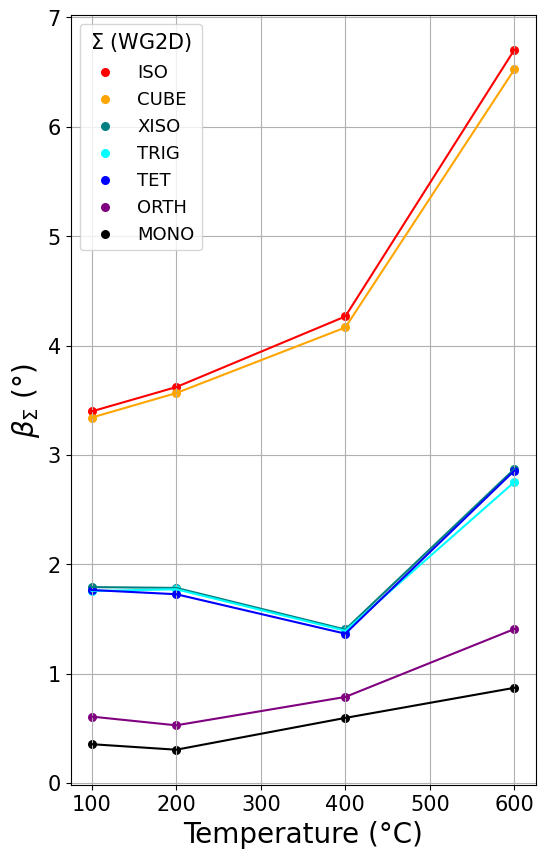

In [6]:
plt.figure(figsize=(6,10))

for i, sym_class in enumerate(symmetry_classes):
    plt.scatter(temperatures_WG2D, betas_WG2D[i], color=colors[sym_class], s=30, label=sym_class)
    plt.plot(temperatures_WG2D, betas_WG2D[i], color=colors[sym_class])

plt.legend(loc=2, fontsize=13, title=r'${\Sigma}$ (WG2D)', title_fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlabel("Temperature (°C)", fontsize=20)
plt.ylabel(r'$\beta_{\Sigma}$ (°)', fontsize=20)
if write: plt.savefig('WG2D.png', bbox_inches='tight')

In [7]:
# Analysis for Lokajicek et al. 2021 Table 3 materials
# US Velocities Inversion -
# - WG100 (0.1 MPa)
# - WG100 (400 MPa)
# - WG600 (0.1 MPa)
# - WG600 (400 MPa)

materials = ['WG100 (0.1MPa)','WG100 (400MPa)','WG600 (0.1MPa)','WG600 (400MPa)']
symmetry_classes = ['MONO','ORTH','TET','TRIG','XISO','CUBE','ISO']

c_vecs = get_materials_Cvec(material="Lokajicek")
c_vecs = c_vecs[4:]

n_materials = len(materials)
n_symmetry_classes = len(symmetry_classes)

num_workers = os.cpu_count()

betas_all = np.zeros((n_materials, n_symmetry_classes))

c_vecs   = c_vecs * n_symmetry_classes
sigmas   = [sigma for sigma in symmetry_classes for _ in range(n_materials)]

distance_new = partial(distance, use_parallel_processing=False)
with concurrent.futures.ProcessPoolExecutor(max_workers=num_workers) as executor:
    results = list(executor.map(distance_new, c_vecs, sigmas))

betas, thetas, sigmas, phis = list(zip(*results))

for i in range(n_materials):
    index = np.arange(n_symmetry_classes) * n_materials + i
    betas_all[i,:]  = np.array([betas[ind] for ind in index])

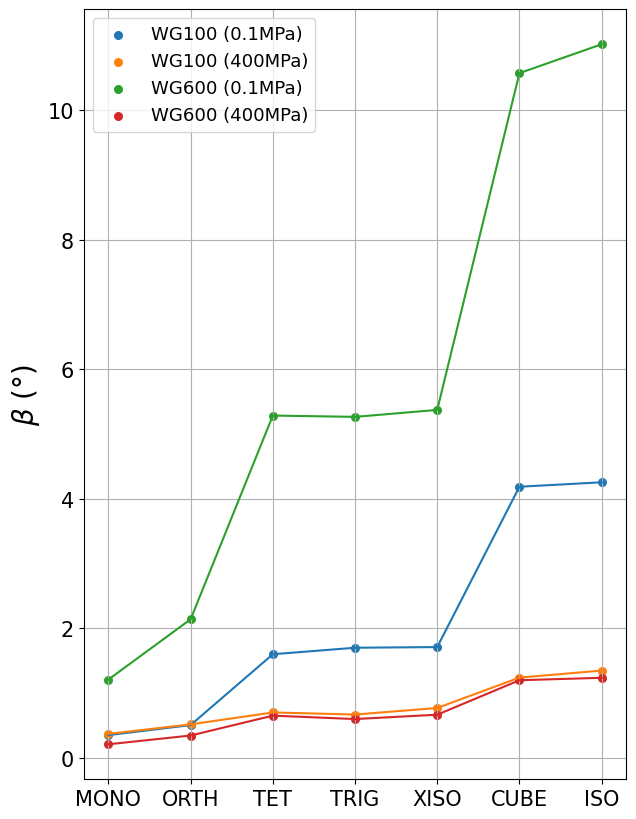

In [8]:
plt.figure(figsize=(7,10))

x = np.arange(n_symmetry_classes)

for i, material in enumerate(materials):
    plt.scatter(x, betas_all[i], s=30, label=material)
    plt.plot(x, betas_all[i],)

plt.xticks(x, symmetry_classes, fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc=2, fontsize=13)
plt.grid()
plt.ylabel(r'$\beta$ (°)', fontsize=20)
if write: plt.savefig('Lokajicek_Table3.png', bbox_inches='tight')